In [ ]:

import numpy as np
import pandas as pd

In [ ]:
!pip install pmdarima

In [ ]:
df=pd.read_csv('OnePointSST.csv')
#df.index.freq = 'D'

In [ ]:
df

,time,latitude,longitude,SST
0,2013-02-02T00:00:00Z,12,74,29.25
1,2013-02-03T00:00:00Z,12,74,29.25
2,2013-02-04T00:00:00Z,12,74,29.55
3,2013-02-05T00:00:00Z,12,74,29.70
4,2013-02-06T00:00:00Z,12,74,29.70
...,...,...,...,...
2974,2021-03-29T00:00:00Z,12,74,31.20
2975,2021-03-30T00:00:00Z,12,74,31.35
2976,2021-03-31T00:00:00Z,12,74,31.20
2977,2021-04-01T00:00:00Z,12,74,31.20


In [ ]:
df['time'] = pd.to_datetime(df['time']).dt.date
df['Date'] = pd.to_datetime(df['time'] )
df = df.set_index('Date')
print(df.index)
df

DatetimeIndex(['2013-02-02', '2013-02-03', '2013-02-04', '2013-02-05',
               '2013-02-06', '2013-02-07', '2013-02-08', '2013-02-09',
               '2013-02-10', '2013-02-11',
               ...
               '2021-03-24', '2021-03-25', '2021-03-26', '2021-03-27',
               '2021-03-28', '2021-03-29', '2021-03-30', '2021-03-31',
               '2021-04-01', '2021-04-02'],
              dtype='datetime64[ns]', name='Date', length=2979, freq=None)


,time,latitude,longitude,SST
Date,,,,
2013-02-02,2013-02-02,12,74,29.25
2013-02-03,2013-02-03,12,74,29.25
2013-02-04,2013-02-04,12,74,29.55
2013-02-05,2013-02-05,12,74,29.70
2013-02-06,2013-02-06,12,74,29.70
...,...,...,...,...
2021-03-29,2021-03-29,12,74,31.20
2021-03-30,2021-03-30,12,74,31.35
2021-03-31,2021-03-31,12,74,31.20


In [ ]:
df=df.drop('time',axis=1)
df.head()

,latitude,longitude,SST
Date,,,
2013-02-02,12,74,29.25
2013-02-03,12,74,29.25
2013-02-04,12,74,29.55
2013-02-05,12,74,29.70
2013-02-06,12,74,29.70


In [ ]:
len(df)

2979

In [ ]:
df.isnull().sum()

latitude       0
longitude      0
SST          165
dtype: int64

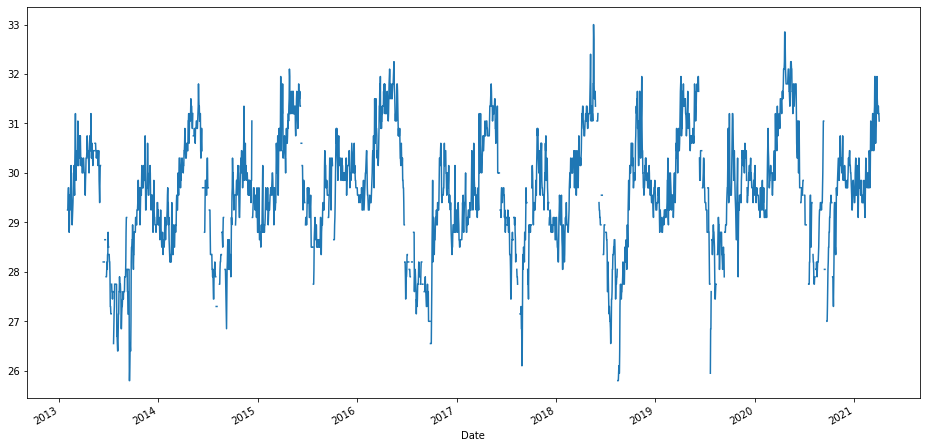

In [ ]:
df['SST'].plot(figsize=(16,8));

In [ ]:
df=df.fillna(method='ffill')

In [ ]:
df.to_csv('abc',sep='\t')

In [ ]:
if(df.iloc[122]['SST']==np.nan):
  print('good')

In [ ]:
df.iloc[0]

latitude     12.00
longitude    74.00
SST          29.25
Name: 2013-02-02 00:00:00, dtype: float64

In [ ]:
df

,latitude,longitude,SST
Date,,,
2013-02-02,12,74,29.25
2013-02-03,12,74,29.25
2013-02-04,12,74,29.55
2013-02-05,12,74,29.70
2013-02-06,12,74,29.70
...,...,...,...
2021-03-29,12,74,31.20
2021-03-30,12,74,31.35
2021-03-31,12,74,31.20


In [ ]:
type(df.iloc[122]['SST'])

numpy.float64

In [ ]:
if(df.iloc[129]['SST']==28.2):
  print('good')

good


In [ ]:
df.iloc[129]['SST']

28.2

In [ ]:
df

,latitude,longitude,SST
Date,,,
2013-02-02,12,74,29.25
2013-02-03,12,74,29.25
2013-02-04,12,74,29.55
2013-02-05,12,74,29.70
2013-02-06,12,74,29.70
...,...,...,...
2021-03-29,12,74,31.20
2021-03-30,12,74,31.35
2021-03-31,12,74,31.20


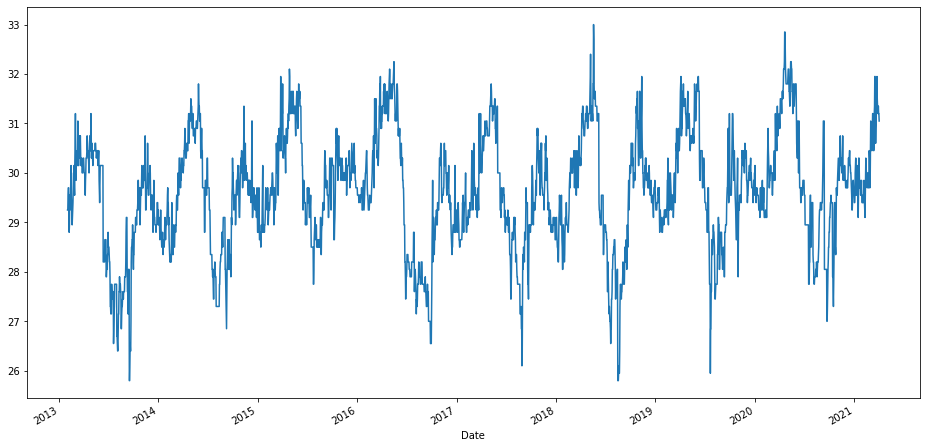

In [ ]:
df['SST'].plot(figsize=(16,8));

In [ ]:
df.isnull().sum()

latitude     0
longitude    0
SST          0
dtype: int64

In [ ]:
len(df)

2979

In [ ]:
# daily Means
df=df.resample(rule='D').mean()
df.head()

,latitude,longitude,SST
Date,,,
2013-02-02,12.0,74.0,29.25
2013-02-03,12.0,74.0,29.25
2013-02-04,12.0,74.0,29.55
2013-02-05,12.0,74.0,29.70
2013-02-06,12.0,74.0,29.70


In [ ]:
len(df)

2982

In [ ]:
df.isnull().sum()

latitude     3
longitude    3
SST          3
dtype: int64

In [ ]:
none=[]
for index,row in df.iterrows():
  is_nan=row.isnull()
  if is_nan.any():
    none.append(index)
print(none)    

[Timestamp('2013-05-10 00:00:00', freq='D'), Timestamp('2013-05-20 00:00:00', freq='D'), Timestamp('2013-05-30 00:00:00', freq='D')]


In [ ]:
df.iloc[97]

latitude    NaN
longitude   NaN
SST         NaN
Name: 2013-05-10 00:00:00, dtype: float64

In [ ]:
df=df.fillna(method='ffill')
df.isnull().sum()

latitude     0
longitude    0
SST          0
dtype: int64